In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CF = pd.read_excel('/content/drive/MyDrive/Senior Fall/Senior Thesis/Data/Separately/Preqin_CF.xlsx')

NameError: ignored

In [ ]:
CF.head()

,FUND ID,FIRM ID,NAME,FUND MANAGER,VINTAGE / INCEPTION YEAR,STRATEGY,FUND SIZE (USD MN),TRANSACTION TYPE,TRANSACTION DATE,TRANSACTION AMOUNT,CUMULATIVE CONTRIBUTION,CUMULATIVE DISTRIBUTION,NET CASHFLOW,QUARTILE,STATUS,GEOGRAPHIC FOCUS,INDUSTRIES
0,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2016-02-14,2253.33,-5557778.67,4.717587e+05,-5.086020e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
1,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2017-02-14,-981510.67,-7860288.00,7.916400e+05,-7.068648e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
2,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2018-02-14,-1231270.67,-9091558.67,1.306909e+06,-7.784649e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
3,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2019-02-14,-979877.33,-10146100.00,2.722340e+06,-7.423760e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
4,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2020-02-14,-97437.33,-10676508.00,4.422269e+06,-6.254239e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."


In [ ]:
CF['TRANSACTION YEAR'] = pd.to_datetime(CF['TRANSACTION DATE']).dt.year
CF['TRANSACTION AMOUNT (MN)'] = CF['TRANSACTION AMOUNT'] / 1000000

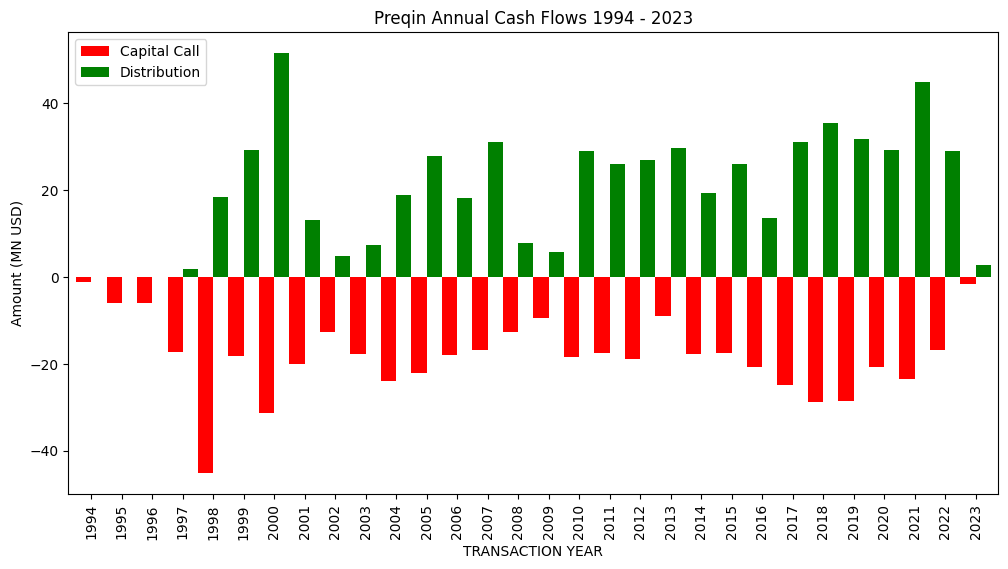

In [ ]:
desired_transaction_types = ['Capital Call', 'Distribution']
CF_filtered = CF[CF['TRANSACTION TYPE'].isin(desired_transaction_types)]
CF_annual = CF_filtered.groupby(['TRANSACTION YEAR', 'TRANSACTION TYPE'])['TRANSACTION AMOUNT (MN)'].sum().unstack(fill_value=0)
ax = CF_annual.plot(y=['Capital Call', 'Distribution'], kind='bar', color=['red', 'green'], figsize=(12, 6), width=1)
ax.legend(loc='upper left')
ax.set_title('Preqin Annual Cash Flows 1994 - 2023')
ax.set_ylabel('Amount (MN USD)')
plt.show()

In [ ]:
CF_annual

TRANSACTION TYPE,Capital Call,Distribution
TRANSACTION YEAR,,
1994,-1.224426,0.000000
1995,-5.923460,0.000000
1996,-6.082405,0.000000
1997,-17.143843,1.884195
1998,-45.164755,18.510459
1999,-18.233831,29.236142
2000,-31.277562,51.547443
2001,-19.923166,13.168320
2002,-12.650887,4.827503


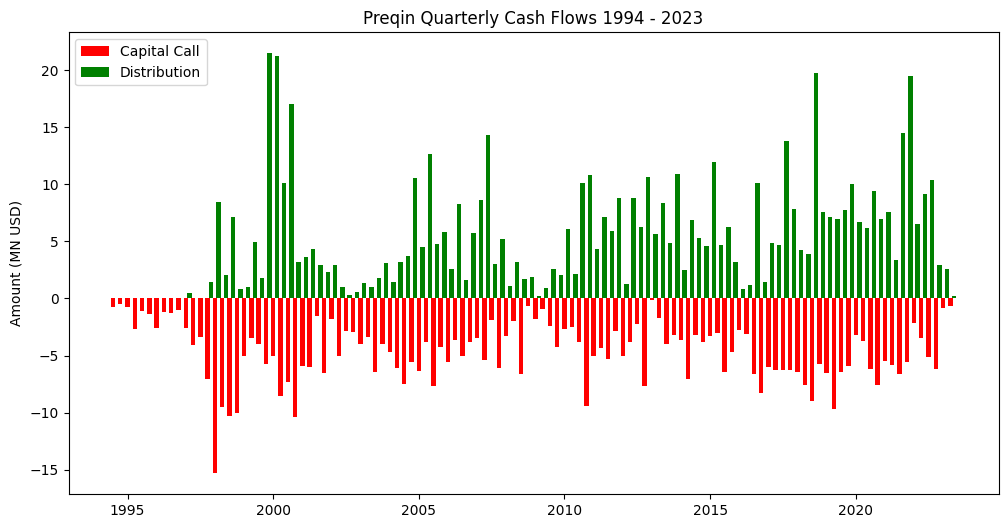

In [ ]:
CF['QUARTER'] = CF['TRANSACTION DATE'].dt.quarter
CF_filtered = CF[CF['TRANSACTION TYPE'].isin(desired_transaction_types)]
CF_quarter = CF_filtered.groupby(['TRANSACTION YEAR', 'QUARTER', 'TRANSACTION TYPE'])['TRANSACTION AMOUNT (MN)'].sum().unstack(fill_value=0)
plt.show()
CF_quarter

import matplotlib.pyplot as plt
import numpy as np
CapCall = CF_quarter['Capital Call'].to_numpy()
Dist = CF_quarter['Distribution'].to_numpy()
years = list(CF_quarter.index)
years = [y[0] for y in years]
increment_1 = [0.25 * i % 1 for i in range(len(years)+2)][2:]
increment_2 = [0.25 * i % 1 + 0.125 for i in range(len(years)+2)][2:]
ticks_1 = np.array(years) + np.array(increment_1)
ticks_2 = np.array(years) + np.array(increment_2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(ticks_1, CapCall, color='red', label='Capital Call', width=0.15)
ax.bar(ticks_2, Dist, color='green', label='Distribution', width=0.15)
ax.legend(loc='upper left')
ax.set_ylabel('Amount (MN USD)')
ax.set_title('Preqin Quarterly Cash Flows 1994 - 2023')
plt.show()

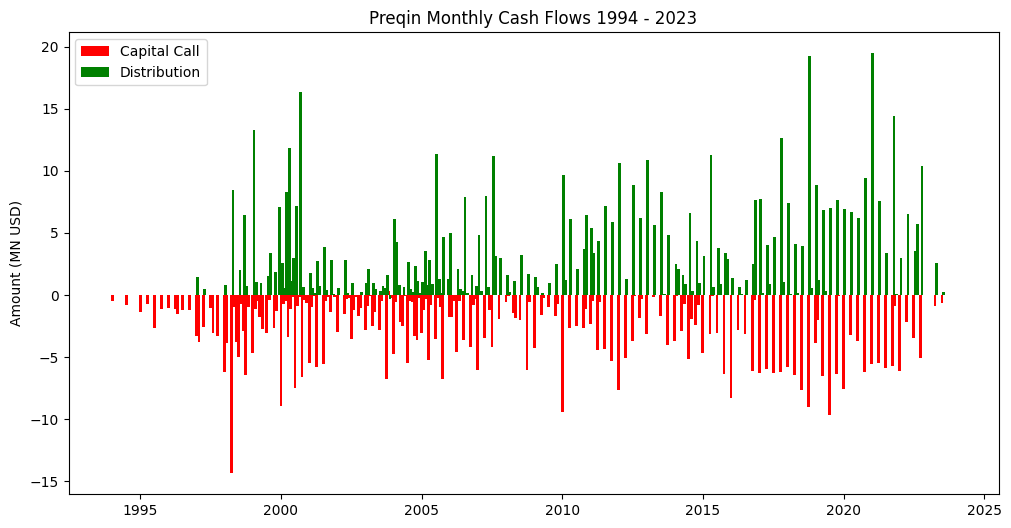

In [ ]:
from re import I
CF['MONTH'] = CF['TRANSACTION DATE'].dt.month
CF_filtered = CF[CF['TRANSACTION TYPE'].isin(desired_transaction_types)]
CF_monthly = CF_filtered.groupby(['TRANSACTION YEAR', 'MONTH', 'TRANSACTION TYPE'])['TRANSACTION AMOUNT (MN)'].sum().unstack(fill_value=0)
copy = CF_monthly.copy()

years = list(CF_monthly.index)
years = [y[0] for y in years]
years = np.unique(years)
months = range(1, 13)

for year in years:
  for month in months:
    if (year, month) not in list(copy.index):
      copy.loc[(year, month),:] = [0, 0]

years = list(copy.index)
years = [y[0] for y in years]
months = [m[1] for m in list(copy.index)]

index = np.zeros(len(years))
for i in range(len(years)):
  index[i] = years[i] + months[i] * 1/12 - 1/12
copy['Index'] = index
copy = copy.sort_values(by='Index', ascending=True)

import matplotlib.pyplot as plt
import numpy as np
CapCall = copy['Capital Call'].to_numpy()
Dist = copy['Distribution'].to_numpy()
years = list(copy.index)
years = [y[0] for y in years]
increment_1 = [1/12 * i % 1 for i in range(len(years)+2)][2:]
increment_2 = [1/12 * i % 1 + 1/24 for i in range(len(years)+2)][2:]
ticks_1 = np.array(years) + np.array(increment_1)
ticks_2 = np.array(years) + np.array(increment_2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(ticks_1, CapCall, color='red', label='Capital Call', width=0.1)
ax.bar(ticks_2, Dist, color='green', label='Distribution', width=0.1)
ax.legend(loc='upper left')
ax.set_ylabel('Amount (MN USD)')
ax.set_title('Preqin Monthly Cash Flows 1994 - 2023')
plt.show()

# FUND VALUES

In [ ]:
FV.head()

,FUND ID,FIRM ID,FUND SERIES ID,NAME,VINTAGE / INCEPTION YEAR,STATUS,STRATEGY,GEOGRAPHIC FOCUS,FUND SIZE (USD MN),FINAL CLOSE DATE,FINAL CLOSE SIZE (USD MN),FUND MANAGER,COUNTRY,REGION,ADDRESS,FUND STRUCTURE,DOMICILE,CORE INDUSTRIES,INDUSTRY VERTICALS
0,2,152327,137.0,1818 Fund,1989.0,Liquidated,Buyout,US,325.0,1989-09-30,325.0,Brown Brothers Harriman,US,North America,140 Broadway,Commingled,NaN,Diversified,Manufacturing
1,3,152327,137.0,1818 Fund II,1993.0,Liquidated,Buyout,US,475.0,1993-06-30,475.0,Brown Brothers Harriman,US,North America,140 Broadway,Commingled,NaN,Diversified,NaN
2,4,152327,137.0,1818 Fund III,1998.0,Liquidated,Buyout,US,530.0,1998-12-31,530.0,Brown Brothers Harriman,US,North America,140 Broadway,Commingled,NaN,Diversified,Manufacturing
3,55940,173025,3777.0,1901 Partners,2015.0,Closed,Buyout,North America,500.0,2015-11-25,500.0,1901 Partners,US,North America,"1 Village Plaza Suite 103, Kings Park",Commingled,Delaware,Energy & Utilities,NaN
4,98127,173025,3777.0,1901-LES Partners,2017.0,Closed,Buyout,North America,NaN,2017-12-31,NaN,1901 Partners,US,North America,"1 Village Plaza Suite 103, Kings Park",Commingled,Delaware,Energy & Utilities,NaN


In [ ]:
FV = pd.read_excel('/content/drive/MyDrive/Senior Fall/Senior Thesis/Data/Separately/Preqin_funds.xlsx')
FV.drop(columns=['FIRM ID', 'FUND SERIES ID', 'NAME', 'STATUS', 'STRATEGY',
                 'GEOGRAPHIC FOCUS', 'FUND SIZE (USD MN)', 'FINAL CLOSE DATE', 'FUND MANAGER',
                 'COUNTRY', 'REGION', 'ADDRESS', 'FUND STRUCTURE', 'DOMICILE', 'CORE INDUSTRIES', 'INDUSTRY VERTICALS' ], inplace=True)

FV.rename(columns={'VINTAGE / INCEPTION YEAR': 'Vintage'}, inplace=True)

DF = FV.groupby("Vintage").agg({
    "FUND ID": "count",
    "FINAL CLOSE SIZE (USD MN)": "sum"
})

DF.rename(columns={'FUND ID': 'Number Funds', 'FINAL CLOSE SIZE (USD MN)' : 'Commitments (USD MN)'}, inplace=True)
DF['Commitments (USD BN)'] = DF['Commitments (USD MN)'] / 1000
DF = DF.drop(columns={'Commitments (USD MN)'})
DF

,Number Funds,Commitments (USD BN)
Vintage,,
1977.0,1,0.02440
1979.0,1,0.03330
1980.0,6,0.50310
1981.0,2,0.00000
1982.0,1,0.32260
1983.0,3,0.20600
1984.0,12,1.78500
1985.0,5,1.19200
1986.0,9,1.78250


In [ ]:
result_df = DF.copy()

# Initialize the 'Sum of Contributions (USD BN)' column with zeros
result_df['Sum of Contributions (USD BN)'] = 0

# Iterate through the 'Vintage' years and update 'Sum of Contributions (USD BN)' using 'Capital Call' values
for vintage_year, row in result_df.iterrows():
    if vintage_year - 1 in CF_annual.index:
        # Find the corresponding 'Capital Call' value for the previous year in 'CF_annual'
        capital_call_value = -CF_annual.loc[vintage_year - 1, 'Capital Call']
        result_df.at[vintage_year, 'Sum of Contributions (USD BN)'] = capital_call_value

# Display the resulting DataFrame with the new column
result_df

,Number Funds,Commitments (USD BN),Sum of Contributions (USD BN)
Vintage,,,
1977.0,1,0.02440,0.000000
1979.0,1,0.03330,0.000000
1980.0,6,0.50310,0.000000
1981.0,2,0.00000,0.000000
1982.0,1,0.32260,0.000000
1983.0,3,0.20600,0.000000
1984.0,12,1.78500,0.000000
1985.0,5,1.19200,0.000000
1986.0,9,1.78250,0.000000


＃ IRR

In [ ]:
CF = pd.read_excel('/content/drive/MyDrive/Senior Fall/Senior Thesis/Data/Separately/Preqin_CF.xlsx')

In [ ]:
CF = CF[["Transaction Date", "Transaction Type", "Transaction Amount"]]
CF = CF[CF["Transaction Type"] != "Value"]
# Drops funds with Transaction Type == Value
# Only keep Transaction Date, Transaction TYpe, and Transaction Amount

,FUND ID,FIRM ID,NAME,FUND MANAGER,VINTAGE / INCEPTION YEAR,STRATEGY,FUND SIZE (USD MN),TRANSACTION TYPE,TRANSACTION DATE,TRANSACTION AMOUNT,CUMULATIVE CONTRIBUTION,CUMULATIVE DISTRIBUTION,NET CASHFLOW,QUARTILE,STATUS,GEOGRAPHIC FOCUS,INDUSTRIES
0,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2016-02-14,2.253330e+03,-5557778.67,4.717587e+05,-5.086020e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
1,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2017-02-14,-9.815107e+05,-7860288.00,7.916400e+05,-7.068648e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
2,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2018-02-14,-1.231271e+06,-9091558.67,1.306909e+06,-7.784649e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
3,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2019-02-14,-9.798773e+05,-10146100.00,2.722340e+06,-7.423760e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
4,24849,5772,Actis Global 4,Actis,2012,Balanced,1428.0,Capital Call,2020-02-14,-9.743733e+04,-10676508.00,4.422269e+06,-6.254239e+06,4.0,Closed,NaN,"Consumer Products, Consumer Services, Educatio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,5407,804,Weston Presidio V,Weston Presidio Capital,2005,Balanced,1000.0,Value,2016-12-31,1.742857e+06,-9914285.71,2.054286e+07,1.062857e+07,1.0,Liquidated,US,"Business Support Services, Healthcare, Informa..."
4524,5407,804,Weston Presidio V,Weston Presidio Capital,2005,Balanced,1000.0,Value,2017-12-31,7.142857e+05,-9914285.71,2.188571e+07,1.197143e+07,1.0,Liquidated,US,"Business Support Services, Healthcare, Informa..."
4525,5407,804,Weston Presidio V,Weston Presidio Capital,2005,Balanced,1000.0,Value,2018-12-31,5.691310e+05,-10252154.00,2.239569e+07,1.214354e+07,1.0,Liquidated,US,"Business Support Services, Healthcare, Informa..."
4526,5407,804,Weston Presidio V,Weston Presidio Capital,2005,Balanced,1000.0,Value,2019-12-31,8.766956e+05,-10252154.00,2.239569e+07,1.214354e+07,1.0,Liquidated,US,"Business Support Services, Healthcare, Informa..."
